# 1. Iterative Predictions

In [7]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

In [4]:
X_ini = np.random.uniform(-3.,3.,(20,1))
Y_ini = np.sin(X_ini) + np.random.randn(20,1)*0.05

In [92]:
#References: https://stats.stackexchange.com/questions/198327/sampling-from-gaussian-process-posterior
#          : https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_gp.ipynb

def updatePosterior(X,Y,steps):
    if steps > 0:
        new_X = np.random.uniform(-3.,3.,(1,1))
        new_Y = np.sin(new_X) + np.random.randn(1,1)*0.05
        X = np.append(X,new_X).reshape(-1,1)
        Y = np.append(Y,new_Y).reshape(-1,1)
        kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=2)
        model = GPy.models.GPRegression(X,Y,kernel)
        testX = np.linspace(-3, 3, 100).reshape(-1, 1)
        posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=10)
        sample_data = {}
        for sample in range(10):
            sample_data[sample] = []
        for j in posteriorTestY:
            for k in range(10):
                sample_data[k].append(j[0][k])
        simY, simMse = model.predict(testX)

        for sample in sample_data.keys():
            plt.plot(testX, sample_data[sample])
        plt.plot(X, Y, 'ok', markersize=4)
        plt.xlabel("x_1")
        plt.ylabel("f(x_1)")
        plt.title(f"{len(X)} data points")
        plt.show()
        
        steps -= 1
        updatePosterior(X,Y,steps)

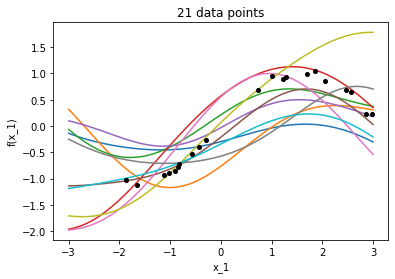

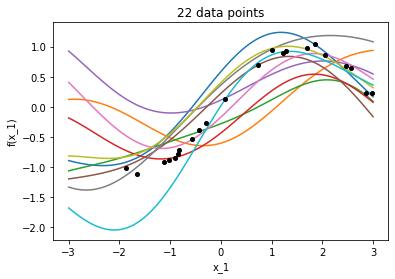

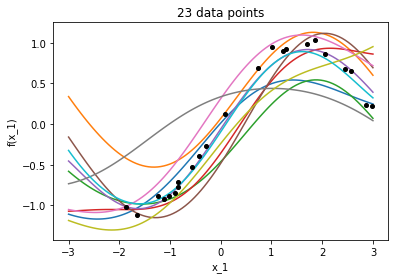

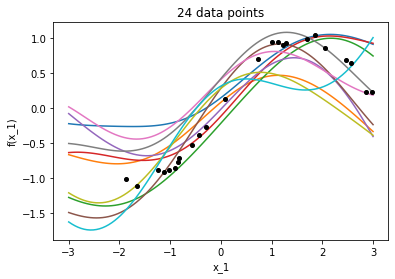

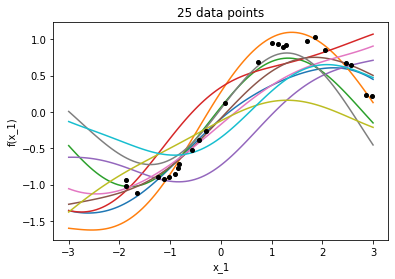

In [93]:
updatePosterior(X_ini,Y_ini,5)

# 2. CO2 Concentration

In [81]:
import pandas as pd

In [82]:
df = pd.read_fwf('co2_mm_mlo.txt',header=None)

In [83]:
df = df.drop([0,1,4,5,6,7], axis=1)

In [94]:
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1)
model = GPy.models.GPRegression(df[2].values.reshape(-1,1),df[3].values.reshape(-1,1),kernel)

In [95]:
model.optimize_restarts(num_restarts = 10);

Optimization restart 1/10, f = 1674.3106271762638
Optimization restart 2/10, f = 1687.748478354335
Optimization restart 3/10, f = 1674.3106283460718
Optimization restart 4/10, f = 1687.7484784361325
Optimization restart 5/10, f = 1674.3106388550218
Optimization restart 6/10, f = 1674.3106276741933
Optimization restart 7/10, f = 1674.31062720857
Optimization restart 8/10, f = 1674.3106272934683
Optimization restart 9/10, f = 1687.7491026169423
Optimization restart 10/10, f = 1674.3106271872575


GP_regression.,value,constraints,priors
rbf.variance,126231.85229980208,+ve,
rbf.lengthscale,54.581912268506805,+ve,
Gaussian_noise.variance,4.702939527720436,+ve,


AttributeError: 'dict' object has no attribute 'figure'

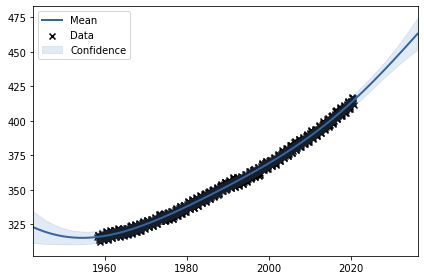

In [96]:
display(model)
fig = model.plot()
GPy.plotting.show(fig,)

In [98]:
from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4